## Testing nestpy functions

Just a notebook to test features from NEST before committing. 

In [2]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 

import nestpy

#### Definitions of output and plotting functions

In [3]:
def yields_curve(interaction=nestpy.nr, fields=[81.], 
                     energy_min=1e-1, energy_max=500):
        """
        Get yields from nestpy from energy min to energy max 
        """
        energies = np.logspace(np.log10(energy_min), np.log10(energy_max), 1000,)
        energies = np.reshape(energies, (1000,1))
        energies = np.broadcast_to(energies, (len(energies), len(fields)))

        kwargs = {'interaction': interaction,
                  'energy': energies, 
                  'drift_field': fields}

        ly = nestpy.PhotonYield(**kwargs)/energies
        qy = nestpy.ElectronYield(**kwargs)/energies

        return (energies, ly, qy)
    
def yields_plot(fields=[100.],
            interaction=nestpy.nr,
            energy_min=0.1, energy_max=500.,
            interaction_title='Nuclear Recoil',
            yields_type='LY',
            savefig=None, 
            **kwargs):
    '''
    Makes a plot of all the different yields at various energies and field values.
    '''

    energies, ly, qy = yields_curve(interaction=interaction, 
                                    fields=fields, 
                                    energy_min=0.1, energy_max=200.)

    plt.figure(1, figsize=(9,6))
    subplot1 = plt.subplot(1,1,1)


    if yields_type.lower()=='ly':
        y, ylabel = ly, r'Photon yield [n$_\gamma$/keV]'

    elif yields_type.lower()=='qy':
        y, ylabel = qy, r'Electron yield [n$_e$/keV]'    

    for f, field in enumerate(fields):
        subplot1.plot(energies[:,f], y[:,f], 
                      label='%.0f V/cm'%(field))

    subplot1.legend(loc='best', ncol=1)
    plt.xscale('log')

    title=yields_type + ' for ' + interaction_title
    subplot1.set_title(title)
    subplot1.set_xlabel('Interaction Energy [keV]')
    subplot1.set_ylabel(ylabel)

    subplot1.margins(0)
    plt.show()
    if savefig is not None:
        plt.savefig(yield_type+'_'+str(savefig)+'.png')

In [4]:
## Define some drift fields: realisitic value between 100 and 200 V/cm.
fields = [1., 10., 30., 50., 100., 150., 200. ]

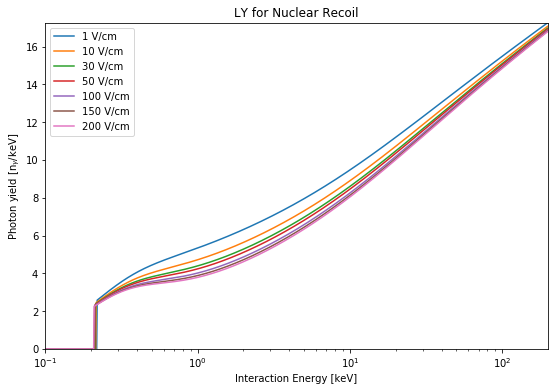

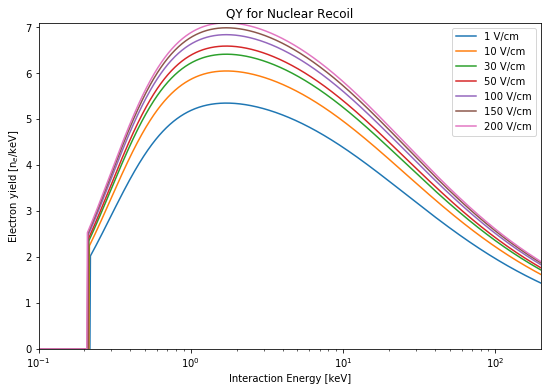

In [5]:
## Get plots for photon yields and electron yields.
yields_plot(fields, interaction=nestpy.nr,
            energy_min=0.1, energy_max=500.,
            interaction_title='Nuclear Recoil',
            yields_type='LY',
            savefig=None, 
           )
yields_plot(fields, interaction=nestpy.nr,
            energy_min=0.1, energy_max=500.,
            interaction_title='Nuclear Recoil',
            yields_type='QY',
            savefig=None, 
           )

In [6]:
# Obtain the energies, ly, and qy arrays from the yields_curve function. Check size. 
energies, ly, qy = yields_curve()
print(len(energies))

1000


In [8]:
# Nestpy usage portion, modified to include the drift field dependence 
interaction = nestpy.nr  # NR
density = 2.9
field = 100. 
E = 210 

nc = nestpy.NESTcalc(nestpy.VDetector())
n_electron = nc.GetYields(interaction, E, density, field)

print(int(n_electron.ElectronYield))

375


In [9]:

nc = nestpy.NESTcalc(nestpy.VDetector())

interaction = nestpy.nr  # NR
#fields = 100. 

E = 210  # keV
print('For an %s keV %s' % (E, interaction))

# Get particle yields
y = nc.GetYields(interaction,
		 E)

print('The electron yield is:', y.ElectronYield)
print('With statistical fluctuations',
      nc.GetQuanta(y).electrons)

For an 210 keV INTERACTION_TYPE.NR
The electron yield is: 379.5588350294156
With statistical fluctuations 344
